Business Problem

As a marketing agency, our primary objective is to maximize the return on investment(ROI) for our clients' advertising campaign. We have conducted two ad campaigns, one on Facebook and on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions and overall cost-effectiveness. By identifying the most effecive platform, we can allocate resources more effficiently and optimize to deliver better outcomes for our clients.

Research Question

Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?

In [ ]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

Data Description

The dataset comprises of a collection of data comparing the performance of two seperate ad campaigns conducted throughout the year. Specifically the data covers a Facebook Ad campaign and an Adwords Ad campaign, For each day of teh year, there is a corresponding row in the dataset resulting in a total of 365 lines of campain data to analyze. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

Key Features in the dataset are as follows:



*   Date: The date corresponding to each row of campaign data, ranging from January 2023, to December 2023

*   Ad views: The number of times the ad was viewed.


*   Ad Clicks: The number of clicks received on the ad

*   Ad conversions: Th enumber of conversions resulting from the ad


*   Cost per ad: The cost associated with running the Facebook ad campaign
*   Click-Through Rate: The ratio of click to views, inicating teh effectiveness of teh ad in driving desired actions


*   Conversion rate: the ratio of conversions to clicks

*   Cost per click: teh avg cost incurred per click on the add.









In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign (2).csv


In [ ]:
df=pd.read_csv("marketing_campaign.csv")

In [ ]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [ ]:
df.shape

(365, 17)

In [ ]:
df.isnull().sum()

,0
Date,0
Facebook Ad Campaign,0
Facebook Ad Views,0
Facebook Ad Clicks,0
Facebook Ad Conversions,0
Cost per Facebook Ad,0
Facebook Click-Through Rate (Clicks / View),0
Facebook Conversion Rate (Conversions / Clicks),0
Facebook Cost per Click (Ad Cost / Clicks),0
AdWords Ad Campaign,0


In [ ]:
df.dtypes

,0
Date,object
Facebook Ad Campaign,object
Facebook Ad Views,int64
Facebook Ad Clicks,int64
Facebook Ad Conversions,int64
Cost per Facebook Ad,object
Facebook Click-Through Rate (Clicks / View),object
Facebook Conversion Rate (Conversions / Clicks),object
Facebook Cost per Click (Ad Cost / Clicks),object
AdWords Ad Campaign,object


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


Comparing Campaigns Performance

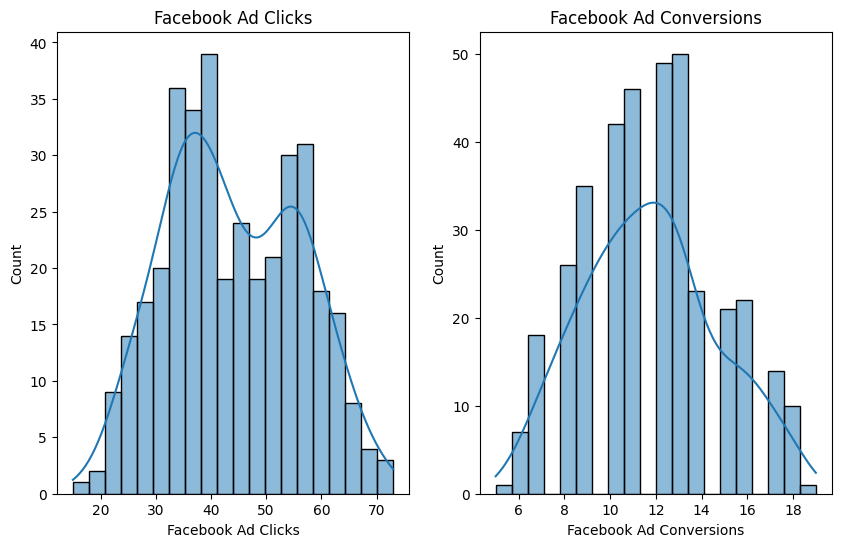

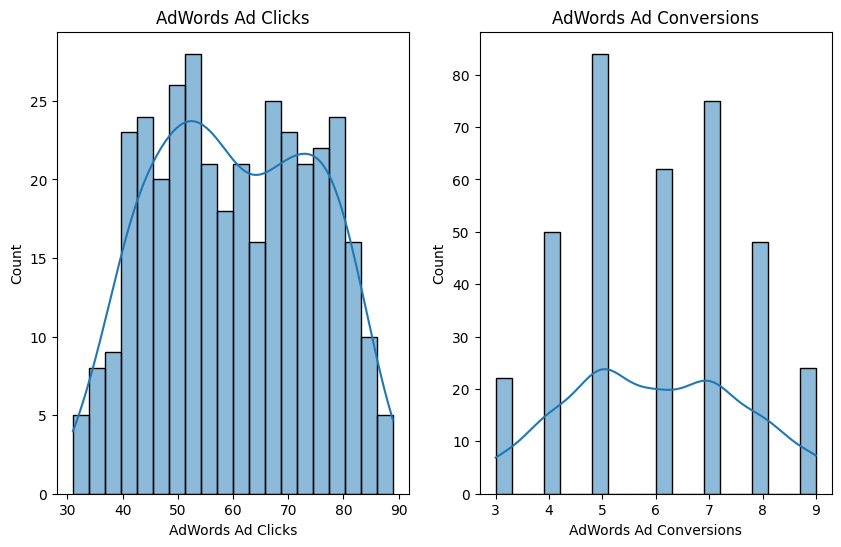

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], bins=20,edgecolor='k',kde=True)
plt.subplot(1,2,2)
plt.title("Facebook Ad Conversions")
sns.histplot(df['Facebook Ad Conversions'], bins=20, edgecolor='k', kde=True)
plt.show()
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'], bins=20,edgecolor='k',kde=True)
plt.subplot(1,2,2)
plt.title("AdWords Ad Conversions")
sns.histplot(df['AdWords Ad Conversions'], bins=20, edgecolor='k', kde=True)
plt.show()


Thsi histogram shows somewhat symmetrical shape. This symmetrical shape suggetss that the number of clicks and conversions is relatively evenly. In other words outliers are not there

How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?

In [ ]:
#creating function to calculate the category for the conversions
def create_conersion_category(conversion_col):
  category=[]
  for conversion in df[conversion_col]:
    if conversion <6:
      category.append('Less than 6')
    elif 6<= conversion < 11:
        category.append('6-10')
    elif 11<= conversion < 16 :
        category.append('11-15')
    else:
        category.append('more than 15')
  return category

df['Facebook Conversion Category']=create_conersion_category('Facebook Ad Conversions') #this means two new columns will be added
df['AdWords Conversion Category']=create_conersion_category('AdWords Ad Conversions')

In [ ]:
df[['Facebook Ad Conversions','Facebook Conversion Category','AdWords Ad Conversions','AdWords Conversion Category']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6-10,5,Less than 6
1,12,11-15,6,6-10
2,8,6-10,4,Less than 6
3,9,6-10,5,Less than 6
4,7,6-10,7,6-10


In [ ]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Conversion Category,AdWords Conversion Category
0,2019-01-01,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30,6-10,Less than 6
1,2019-01-02,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05,11-15,6-10
2,2019-01-03,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23,6-10,Less than 6
3,2019-01-04,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86,6-10,Less than 6
4,2019-01-05,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40,6-10,6-10


In [ ]:
df['Facebook Conversion Category'].value_counts()

,count
Facebook Conversion Category,
11-15,189
6-10,128
more than 15,47
Less than 6,1


This is the count of days when the conversion category was as said

In [ ]:
facebook=pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index()
facebook

,Facebook Conversion Category,count
0,11-15,189
1,6-10,128
2,more than 15,47
3,Less than 6,1


In [ ]:
facebook=pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns={'Facebook Conversion Category':'Category'})
facebook

,Category,count
0,11-15,189
1,6-10,128
2,more than 15,47
3,Less than 6,1


In [ ]:
df['AdWords Conversion Category'].value_counts()

,count
AdWords Conversion Category,
6-10,209
Less than 6,156


In [ ]:
adwords=pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns={'AdWords Conversion Category':'Category'})
adwords

,Category,count
0,6-10,209
1,Less than 6,156


In [ ]:
category_df=pd.merge(facebook,adwords, on='Category', how='outer').fillna(0)
category_df

,Category,count_x,count_y
0,11-15,189,0.0
1,6-10,128,209.0
2,more than 15,47,0.0
3,Less than 6,1,156.0


Now we want that the less than 6 value comes in first and we need to change the location of the output

In [ ]:
category_pdf=category_df.sort_values(by='Category', ascending=True)
category_pdf

,Category,count_x,count_y
0,11-15,189,0.0
1,6-10,128,209.0
3,Less than 6,1,156.0
2,more than 15,47,0.0


Sorting won't work here. The DataFrame category_df you're trying to sort is not getting sorted as expected because the sorting is happening lexicographically (alphabetically) rather than numerically. In lexicographic order, "11-15" comes before "6-10" because "1" comes before "6".

In [ ]:
category_pdf=category_df.iloc[[3,1,0,2]]
category_pdf

,Category,count_x,count_y
3,Less than 6,1,156.0
1,6-10,128,209.0
0,11-15,189,0.0
2,more than 15,47,0.0


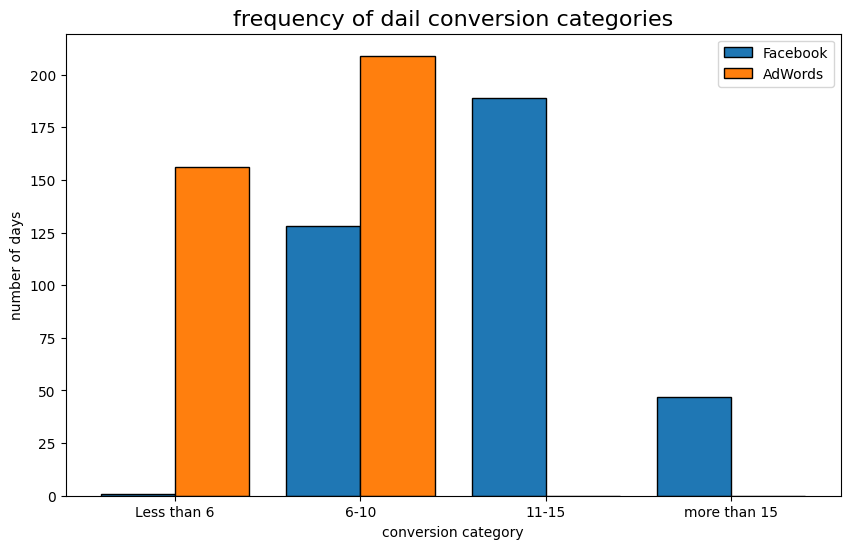

In [ ]:
x_axis=np.arange(len(category_pdf))
plt.figure(figsize=(10,6))
plt.bar(x_axis-0.2, category_pdf['count_x'],0.4,label='Facebook', color='#1f77b4',linewidth=1, edgecolor='k')
plt.bar(x_axis+0.2, category_pdf['count_y'],0.4,label='AdWords', color='#ff7f0e',linewidth=1, edgecolor='k')

plt.xticks(x_axis, category_pdf['Category'])
plt.xlabel('conversion category')
plt.ylabel('number of days')
plt.title('frequency of dail conversion categories', fontsize=16)
plt.legend()
plt.show()



*   The data suggests Facebook had more frequent higher conversion days than Adwords, which either had very low conversion rates(less than 6) or moderate ones (6-10)
*   There is significant variance in the number of high conversion days between two campaigns


*   List item
*   List item





  Do more clicks on ad lead to more sales?

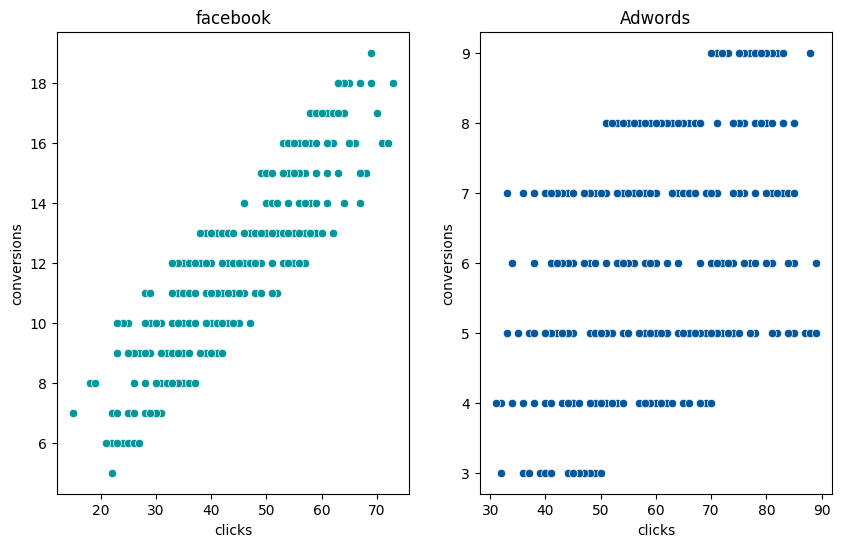

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('facebook')
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='#03989E')
plt.xlabel('clicks')
plt.ylabel('conversions')
plt.subplot(1,2,2)
plt.title('Adwords')
sns.scatterplot(x=df['AdWords Ad Clicks'], y=df['AdWords Ad Conversions'], color='#03589E')
plt.xlabel('clicks')
plt.ylabel('conversions')
plt.show()

In [ ]:
facebook_corr=df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [ ]:
adwords_corr=df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


a CORRELATION COEFFICIENT OF 0.87 INDICTES that a stong positive relationship between clicks and facebook ads and sales.

The adwords has a positive correlation of 0.44 which indicates a moderate realtionship


the moderate corrlation between clicks and adwords sales indicates that while adwords adverising does contribute ito sales, its effectiveness maybe influenced by other factors Furthher analysis is needed.

**HYPOTHESIS** **TESTING**

Hypothesis: Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.

Null Hypothesis (H0): There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.

H0: µ_Facebook ≤ µ_AdWords

Alternate Hypothesis (H1): The number of conversions from Facebook is greater than the number of conversions from AdWords.

H1: µ_Facebook > µ_AdWords

In [ ]:
print('Facebook:' , round(df['Facebook Ad Conversions'].mean(),2))
print('Adwords:' , round(df['AdWords Ad Conversions'].mean(),2))

Facebook: 11.74
Adwords: 5.98


In [ ]:
t_stats,p_value=st.ttest_ind(df['Facebook Ad Conversions'],b=df['AdWords Ad Conversions'], equal_var=False)
print('t_stats:',t_stats)
print('p_value:',p_value)


t_stats: 32.88402060758184
p_value: 9.348918164530465e-134


As the p value is less than the significant value which is 0.05 so we reject the null hypothesis.

The mean number of conversions from Facebook ads (11.74) is substantially higher than the mean number of conversions from AdWords ads (5.98). This suggests that, on average, Facebook advertising is more effective in generating conversions compared to AdWords advertising.
The T statistic (32.88) is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means of the two groups.
The p-value (9.35e-134) is extremely small, indicating strong evidence against the null hypothesis.
The results strongly support the alternate hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the number of conversions from AdWords advertising.
Facebook advertising appears to be a more effective channel for generating conversions compared to AdWords advertising, based on the sample data analyzed.
Given the significant difference in conversion rates between Facebook and AdWords, consider reallocating resources towards Facebook advertising efforts. This could involve increasing ad spend, expanding targeting efforts, or experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions.

Regression Analysis

wWHAT WILL HAPPEN WHEN I DO GO WITH FACEBOOK AD? HOW MANY FACEBOOK AD CONVERSIONS CAN I EXPECT GIVEN A CERTAIN NUMBER OF FACEBOOK AD CLICKS?

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# independent variable
X = df[['Facebook Ad Clicks']]

# dependent variable
y = df[['Facebook Ad Conversions']]

# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):',round(r2,2),'%')
print('Mean Squared Error:', round(mse,2))

Accuracy (R2 Score): 76.35 %
Mean Squared Error: 2.02


In [ ]:
print(f'For {50} clicks, expected conversion: {round(reg_model.predict([[50]])[0][0],2)}')
print(f'For {80} clicks, expected conversion: {round(reg_model.predict([[80]])[0][0],2)}')


For 50 clicks, expected conversion: 13.0
For 80 clicks, expected conversion: 19.31


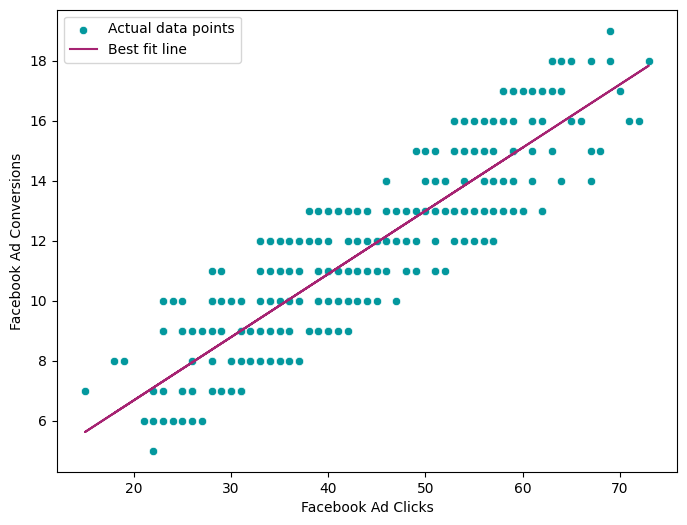

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()

USING DECISION TREES

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# independent variable
X = df[['Facebook Ad Clicks']]

# dependent variable
y = df[['Facebook Ad Conversions']]

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

prediction = regressor.predict(X)

# model evaluation
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):',round(r2,2),'%')
print('Mean Squared Error:', round(mse,2))

Accuracy (R2 Score): 79.91 %
Mean Squared Error: 1.71


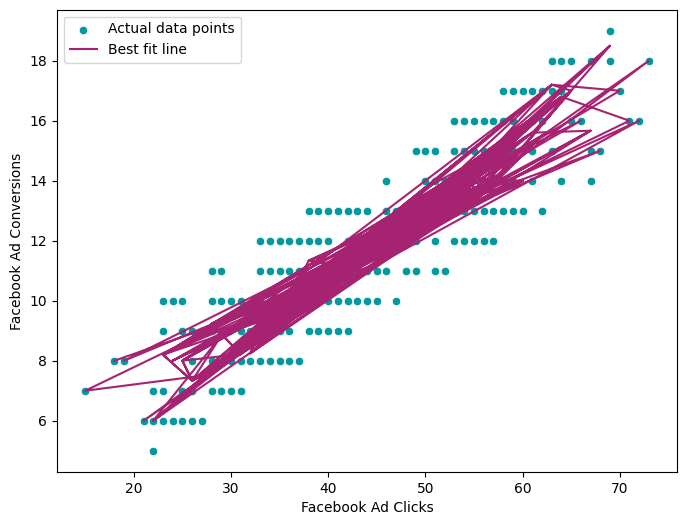

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()

In [ ]:
print(f'For {50} clicks, expected conversion: {round(regressor.predict([[50]])[0],2)}')
print(f'For {80} clicks, expected conversion: {round(regressor.predict([[80]])[0],2)}')

For 50 clicks, expected conversion: 13.75
For 80 clicks, expected conversion: 18.0


Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error

# independent variable
X = df[['Facebook Ad Clicks']]

# dependent variable
y = df[['Facebook Ad Conversions']]


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)


prediction = regressor.predict(X)

# model evaluation
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):',round(r2,2),'%')
print('Mean Squared Error:', round(mse,2))

Accuracy (R2 Score): 79.67 %
Mean Squared Error: 1.73


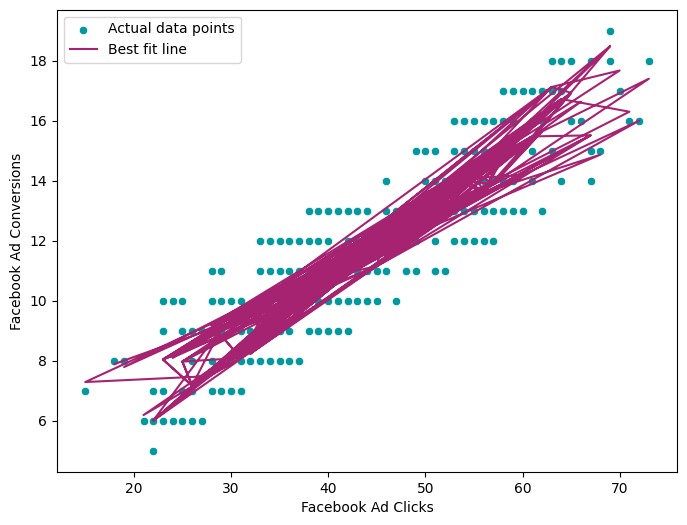

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()

Usinf SVR

In [ ]:
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error

# independent variable
X = df[['Facebook Ad Clicks']]

# dependent variable
y = df[['Facebook Ad Conversions']]


regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)


prediction = regressor.predict(X)

r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):',round(r2,2),'%')
print('Mean Squared Error:', round(mse,2))

Accuracy (R2 Score): 76.34 %
Mean Squared Error: 2.02


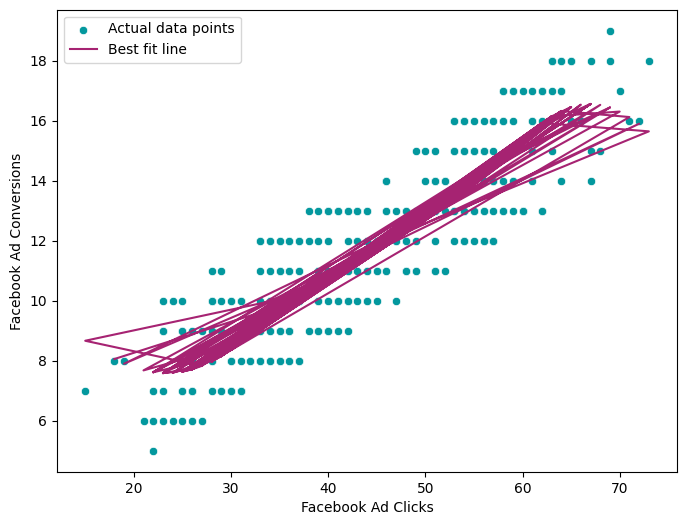

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()


Out of all the models we received the best accuracy with Decision Trees

Return on Investment (ROI) Analysis:

Calculate the total ad spend and conversion for both platforms, then derive the ROI to understand which platform gives a better return for the investment made.

In [ ]:
def return_of_invest(Total_Revenue_from_Conversions, Total_Ad_Spend):
  gh=[]
  for i in range(len(Total_Revenue_from_Conversions)):

  return (Total_Revenue_from_Conversions - Total_Ad_Spend)/Total_Ad_Spend

Analyzing Facebook Campaign metrics over time.

In [ ]:
#cleaning the data removing  the dollar and percentage symbol from the values

df['Facebook Click-Through Rate (Clicks / View)']=df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(str(x).replace('%', ''))) #x[:-1] is a slicing operation
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(str(x).replace('%', '')))
df['Facebook Cost per Click (Ad Cost / Clicks)']=df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(str(x).replace('$', '')))
df['Cost per Facebook Ad']=df['Cost per Facebook Ad'].apply(lambda x: float(str(x).replace('$', '')))

In [ ]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Conversion Category,AdWords Conversion Category
0,2019-01-01,FB_Jan19,2116,18,8,126.0,0.83,42.73,7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30,6-10,Less than 6
1,2019-01-02,FB_Jan19,3106,36,12,104.0,1.15,34.04,2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05,11-15,6-10
2,2019-01-03,FB_Jan19,3105,26,8,102.0,0.84,31.45,3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23,6-10,Less than 6
3,2019-01-04,FB_Jan19,1107,27,9,71.0,2.45,34.76,2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86,6-10,Less than 6
4,2019-01-05,FB_Jan19,1317,15,7,78.0,1.10,47.59,5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40,6-10,6-10


In [ ]:
# filtering for facebook campaign
df = df[['Date','Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)']]

df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38


At what times of the month or days of the week do we observe the conversions?

In [ ]:
#extracting month and week day from the date column

df['month']=df['Date'].dt.month
df['week']=df['Date'].dt.weekday

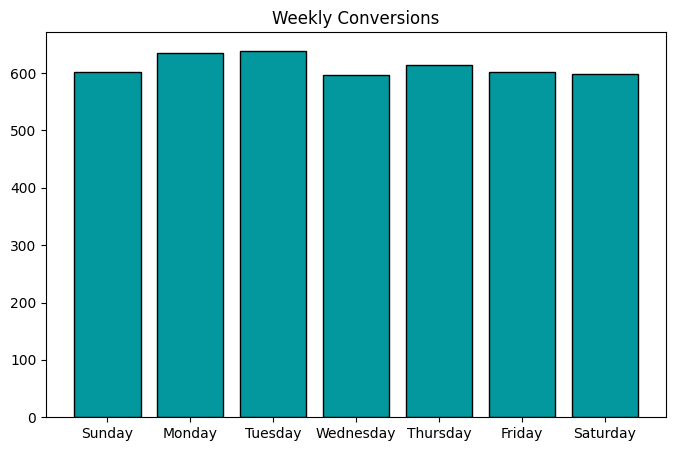

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion=df.groupby('week')[['Facebook Ad Conversions']].sum()
week_names=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'] ,color='#03989E', edgecolor='k')

plt.show()

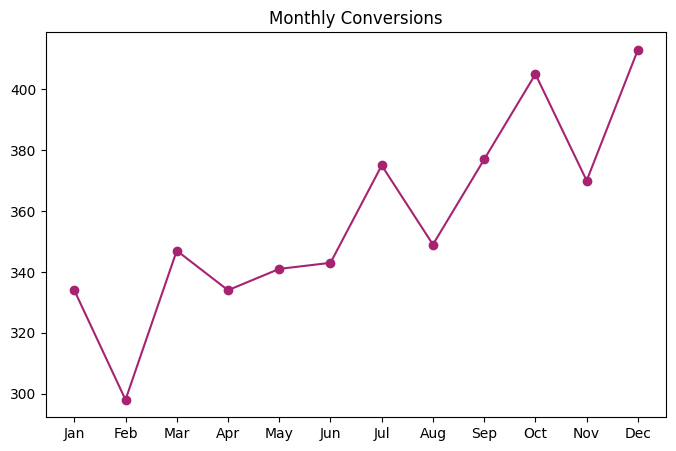

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'],'-o', color = '#A62372')
plt.show()



*   Across the weekdays over a year, the total number of conversions remains relatively consistent, indicating a consistent level of engagement throughout the week. However, Mondays and Tuesdays consistently exhibit the highest conversion rates compared to other days, suggesting that the beginning of the workweek sees heightened user engagement or responsiveness to marketing efforts.

*   Examining the monthly trend in conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However, certain months stand out with variations in conversion rates. February, April, May, June, August, and November experience a decline in conversions compared to neighboring months. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behavior, or adjustments in marketing strategies.



How does the Cost Per Conversion (CPC) trend over time?
Cost Per Conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively

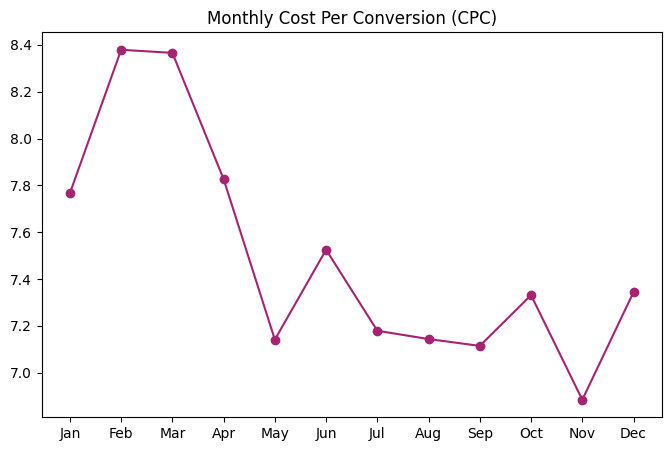

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')
monthly_df = df.groupby('month')[['Facebook Ad Conversions','Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad']/monthly_df['Facebook Ad Conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'],'-o', color = '#A62372')
plt.show()



*   The CPC trend over the 12-month period shows some fluctuations but overall maintains a relatively stable range.
*  May and November have the lowest CPC values, indicating potentially more cost-effective advertising or higher conversion rates during these periods.
* February has the highest CPC value, suggesting that advertising costs may be relatively higher during this month compared to others.
* Lower CPC values in certain months (e.g., May and November) could indicate periods of higher advertising effectiveness or more favorable market conditions.
* Consider allocating more advertising budget to months with historically lower CPC values (e.g., May and November) to maximize ROI.
*   List item



is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?¶